In [14]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
data.shape

(50, 5)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [18]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [19]:
data.describe()


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [20]:
data.rename( columns={'Unnamed: 0':'state'}, inplace=True )

In [21]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [22]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])

In [23]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


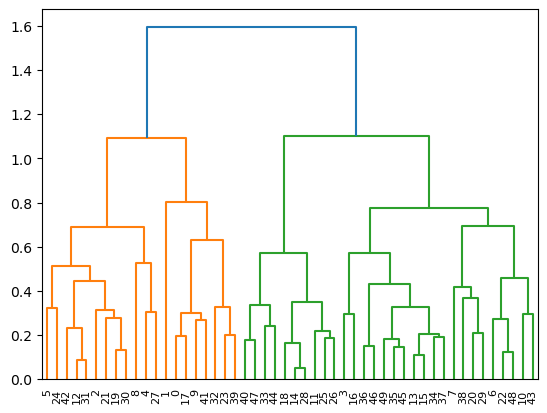

In [24]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [25]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [26]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [27]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [28]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [29]:
data['h_clusterid'] = y_hc

In [30]:
data.head()

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [31]:
data1=data.sort_values("h_clusterid")
data1.iloc[:,:]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
9,Georgia,17.4,211,60,25.8,0
1,Alaska,10.0,263,48,44.5,0
41,Tennessee,13.2,188,59,26.9,0
43,Utah,3.2,120,80,22.9,1
38,Rhode Island,3.4,174,87,8.3,1


In [32]:
data1[data1.h_clusterid==0]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
9,Georgia,17.4,211,60,25.8,0
1,Alaska,10.0,263,48,44.5,0
41,Tennessee,13.2,188,59,26.9,0


In [33]:
data1[data1.h_clusterid==1]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
43,Utah,3.2,120,80,22.9,1
38,Rhode Island,3.4,174,87,8.3,1
37,Pennsylvania,6.3,106,72,14.9,1
22,Minnesota,2.7,72,66,14.9,1
36,Oregon,4.9,159,67,29.3,1
35,Oklahoma,6.6,151,68,20.0,1
34,Ohio,7.3,120,75,21.4,1
45,Virginia,8.5,156,63,20.7,1
29,New Jersey,7.4,159,89,18.8,1
48,Wisconsin,2.6,53,66,10.8,1


In [34]:
data1[data1.h_clusterid==2]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
11,Idaho,2.6,120,54,14.2,2
44,Vermont,2.2,48,32,11.2,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
28,New Hampshire,2.1,57,56,9.5,2
47,West Virginia,5.7,81,39,9.3,2
26,Nebraska,4.3,102,62,16.5,2
25,Montana,6.0,109,53,16.4,2
18,Maine,2.1,83,51,7.8,2
14,Iowa,2.2,56,57,11.3,2


In [35]:
data1['h_clusterid'].nunique()

4

In [36]:
from sklearn.cluster import KMeans

In [37]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(data1.iloc[:,1:])


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

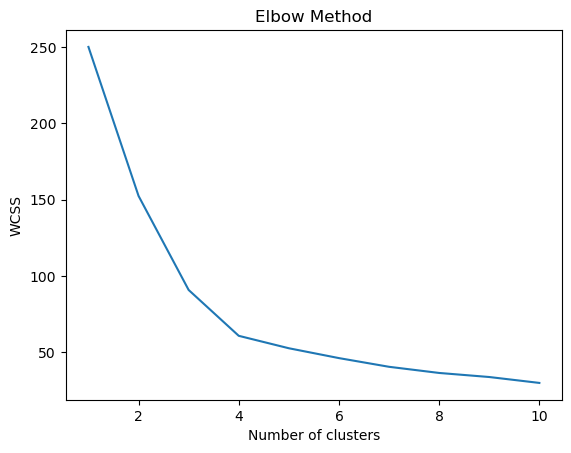

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [40]:
clusters_new.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [41]:
#Assign clusters to the data set
data1['clusterid_new'] = clusters_new.labels_

In [42]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.48039443, -0.45163595,  0.46633327, -0.30243177, -0.50756473],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715,  1.4446073 ],
       [-1.08094018, -1.1441973 , -1.02739379, -1.04370105,  0.37978619],
       [ 1.32475684,  0.90930557, -0.86737678,  0.29612861, -1.37519674]])

In [43]:
data1.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_18860\2095256569.py:1: FutureWarning: ['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data1.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.716667,133.500000,72.222222,18.427778,1.000000
1,1,10.883333,256.916667,78.333333,32.250000,3.000000
2,2,3.127273,76.363636,50.818182,11.554545,1.909091
3,3,13.500000,245.777778,53.111111,23.977778,0.111111


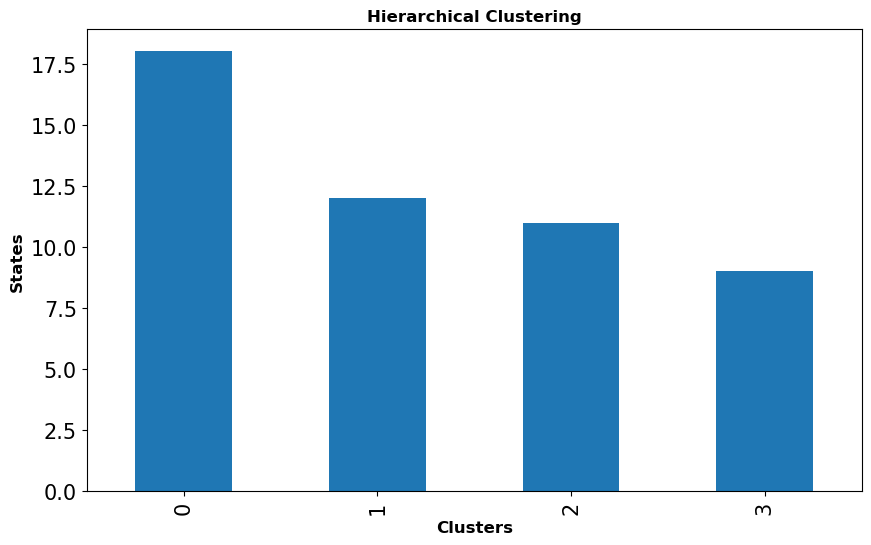

In [44]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data1.groupby(['clusterid_new']).count()['state'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [45]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [46]:
sil_score= silhouette_score(scaled_crime_df,hc.labels_)
sil_score

-0.08693425418998427

In [47]:
data1

,state,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,3
17,Louisiana,15.4,249,66,22.2,0,3
23,Mississippi,16.1,259,44,17.1,0,3
32,North Carolina,13.0,337,45,16.1,0,3
39,South Carolina,14.4,279,48,22.5,0,3
9,Georgia,17.4,211,60,25.8,0,3
1,Alaska,10.0,263,48,44.5,0,3
41,Tennessee,13.2,188,59,26.9,0,3
43,Utah,3.2,120,80,22.9,1,0
38,Rhode Island,3.4,174,87,8.3,1,0


### DBSCAN

In [48]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [49]:
EPS = [0.22, 0.24, 0.26,0.28, 0.30]

for n in EPS:
    dbscan = DBSCAN(eps=0.8, min_samples=4)
    dbscan.fit(scaled_crime_df)
    y=pd.DataFrame(dbscan.fit_predict(scaled_crime_df),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    # silhouette score
    #sil_score= silhouette_score(scaled_crime_df, dbscan.labels_)
    #print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.22 
 -1    38
 0     7
 1     5
Name: clusterid_DBSCAN, dtype: int64
For eps = 0.24 
 -1    38
 0     7
 1     5
Name: clusterid_DBSCAN, dtype: int64
For eps = 0.26 
 -1    38
 0     7
 1     5
Name: clusterid_DBSCAN, dtype: int64
For eps = 0.28 
 -1    38
 0     7
 1     5
Name: clusterid_DBSCAN, dtype: int64
For eps = 0.3 
 -1    38
 0     7
 1     5
Name: clusterid_DBSCAN, dtype: int64


In [50]:
dbscan = DBSCAN(eps=0.28, min_samples=4)
dbscan.fit(scaled_crime_df)

DBSCAN(eps=0.28, min_samples=4)

In [51]:
data1['clusterid_DBSCAN'] = dbscan.labels_
data1.head()

,state,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0,3,-1
17,Louisiana,15.4,249,66,22.2,0,3,-1
23,Mississippi,16.1,259,44,17.1,0,3,-1
32,North Carolina,13.0,337,45,16.1,0,3,-1
39,South Carolina,14.4,279,48,22.5,0,3,-1


In [52]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_18860\2785140324.py:1: FutureWarning: ['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()


,clusterid_DBSCAN,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
,,mean,mean,mean,mean,mean,mean
0,-1,7.788,170.76,65.54,21.232,1.52,1.22
